In [5]:
%pwd

'c:\\Users\\jisna\\Downloads\\Personalized-student-Recommendations\\experiments'

In [6]:
import requests
import pandas as pd
import json  

# Replace this URL with the JSON URL from jsonkeeper.com
json_url = "https://api.jsonserve.com/XgAgFJ"

def pretty_print(data):
    """
    Pretty-print JSON data.
    """
    print(json.dumps(data, indent=4))

def save_json_to_file(data, filename):
    """
    Save JSON data to a file.
    """
    with open(filename, "w") as json_file:
        json.dump(data, json_file, indent=4)  # Save with indentation for readability
    print(f"JSON data saved to {filename}")

try:
    # Fetch the JSON data
    response = requests.get(json_url, verify=False)
    response.raise_for_status()  # Raise an exception for HTTP errors
    data = response.json()

    # Pretty-print the fetched JSON data
    pretty_print(data)

    # Save the JSON data to a file
    save_json_to_file(data, "c:\\Users\\jisna\\Downloads\\Personalized-student-Recommendations\\Data\\fetched_data.json")

except requests.exceptions.RequestException as e:
    print(f"An error occurred while fetching the JSON data: {e}")


c:\Users\jisna\anaconda3\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.jsonserve.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[
    {
        "id": 336497,
        "quiz_id": 51,
        "user_id": "YcDFSO4ZukTJnnFMgRNVwZTE4j42",
        "submitted_at": "2025-01-17T15:30:18.027+05:30",
        "created_at": "2025-01-17T15:30:18.044+05:30",
        "updated_at": "2025-01-17T15:30:18.044+05:30",
        "score": 108,
        "trophy_level": 2,
        "accuracy": "90 %",
        "speed": "100",
        "final_score": "105.0",
        "negative_score": "3.0",
        "correct_answers": 27,
        "incorrect_answers": 3,
        "source": "exam",
        "type": "topic",
        "started_at": "2025-01-17T15:18:30.000+05:30",
        "ended_at": "2025-01-17T15:30:15.000+05:30",
        "duration": "15:00",
        "better_than": 107,
        "total_questions": 100,
        "rank_text": "Topic Rank - #-171",
        "mistakes_corrected": 9,
        "initial_mistake_count": 12,
        "response_map": {
            "2523": 10109,
            "2529": 10130,
            "2533": 10149,
            "2534": 10151,
     

In [7]:
import pandas as pd

# Extract relevant fields
records = []
for record in data:
    flat_record = {
        "user_id": record["user_id"],
        "submitted_at": record["submitted_at"],
        "quiz_id": record["quiz_id"],
        "quiz_title": record["quiz"]["title"],
        "topic": record["quiz"]["topic"],
        "difficulty_level": record["quiz"]["difficulty_level"],
        "total_questions": record["total_questions"],
        "correct_answers": record["correct_answers"],
        "incorrect_answers": record["incorrect_answers"],
        "score": record["score"],  
        "accuracy_percent": float(record["accuracy"].strip(" %")),
        "negative_marks": float(record["quiz"]["negative_marks"]),
        "correct_answer_marks": float(record["quiz"]["correct_answer_marks"]),
        "max_mistake_count": record["quiz"]["max_mistake_count"],
    }
    # Calculate derived metrics
    flat_record["total_score_possible"] = (
        flat_record["total_questions"] * flat_record["correct_answer_marks"]
    )
    flat_record["total_negative_score"] = (
        flat_record["incorrect_answers"] * flat_record["negative_marks"]
    )
    flat_record["performance_gap"] = (
        flat_record["total_score_possible"] - flat_record["score"]
    )
    flat_record["mistakes_allowed_left"] = (
        flat_record["max_mistake_count"] - flat_record["incorrect_answers"]
    )
    records.append(flat_record)

# Create a DataFrame
df = pd.DataFrame(records)

# Save the DataFrame to CSV
df.to_csv("..\\Data\\student_performance.csv", index=False)

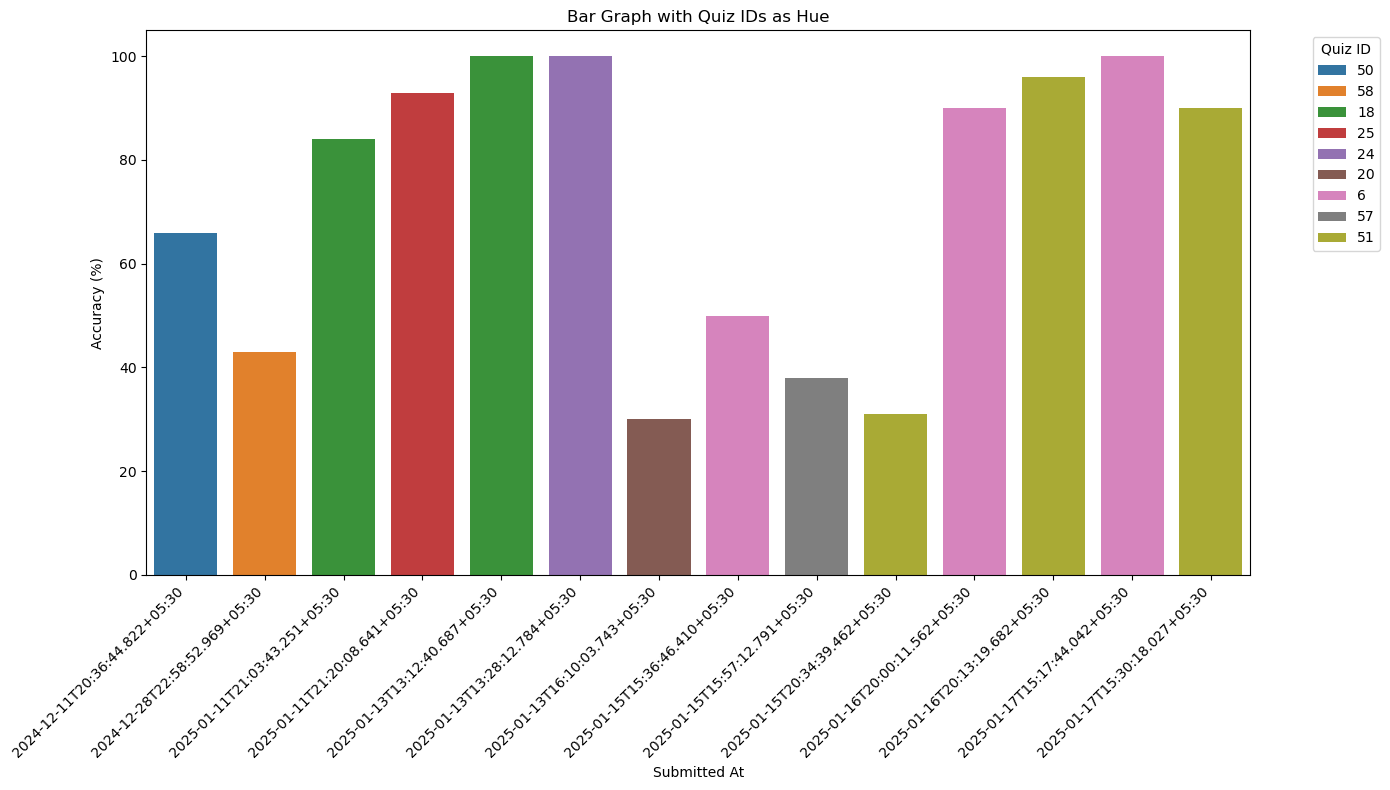

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("..\\Data\\student_performance.csv")

# Convert quiz_id to a categorical variable (string)
df["quiz_id"] = df["quiz_id"].astype(str)
df = df.sort_values(by="submitted_at")

# Set the figure size
plt.figure(figsize=(14, 8))  # Width=14, Height=8

# Plot the bar graph with 'sumitted_at' on the x-axis, 'accuracy_percent' on the y-axis, and 'quiz_id' as hue
sns.barplot(data=df, x="submitted_at", y="accuracy_percent", hue="quiz_id",dodge=False)

# Add labels and title
plt.xlabel("Submitted At")
plt.ylabel("Accuracy (%)")
plt.title("Bar Graph with Quiz IDs as Hue")

# Rotate the x-axis labels
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees with right alignment

# Adjust the legend position and font size
plt.legend(title="Quiz ID", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


The visualization above shows that same quiz taken multiple times has imporved accuaracy. May be the student tried memorize the answers. 
Quiz with quiz_id =6 , quiz_id = 18 and also quiz_id =18. We will visualize the reponse_map to see if the student is trying to answer the same questions or different questions from the same quiz to see if he/she is understanding the mistakes and improving on that.

Now we try to extract the response_map for the quizzes taken multiple times to see if the student has answered the same questions for all attempts.

In [10]:
df = pd.DataFrame(data)

# Filter for  quizzes taken multiple times ( 51, 6, and 18)
filtered_df = df[df["quiz_id"].isin([51, 6, 18])]

# Convert `submitted_at` to datetime for sorting
filtered_df["submitted_at"] = pd.to_datetime(filtered_df["submitted_at"])

# Sort by `submitted_at` in ascending order
sorted_df = filtered_df.sort_values(by="submitted_at")

# Extract the `quiz_id`, `submitted_at`, and `response_map`
output_df = sorted_df[["quiz_id", "submitted_at", "response_map"]]

# Save the result to a CSV file
output_df.to_csv("..\\Data\\quiz_response_maps.csv", index=False)




C:\Users\jisna\AppData\Local\Temp\ipykernel_20420\168675337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["submitted_at"] = pd.to_datetime(filtered_df["submitted_at"])


C:\Users\jisna\AppData\Local\Temp\ipykernel_20420\1933251938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df["response_map"] = output_df["response_map"].apply(lambda x: pd.Series(x).index)


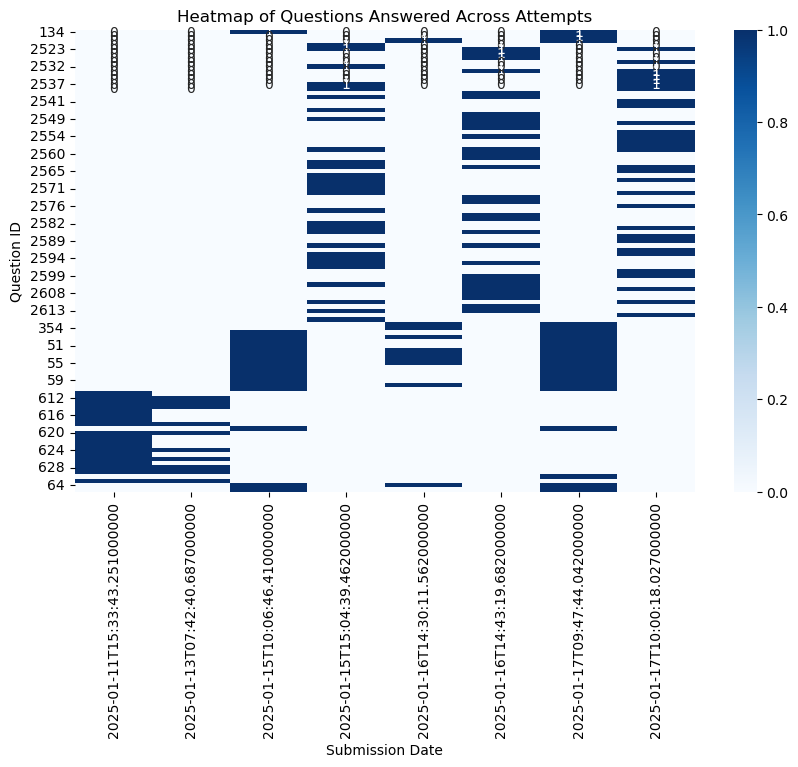

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert response_map into a DataFrame
# extracts the key(question_id) from the response map 
output_df["response_map"] = output_df["response_map"].apply(lambda x: pd.Series(x).index)
#creates a new row for each question_id in the list
exploded = output_df.explode("response_map")

# Create a pivot table for heatmap visualization
heatmap_data = exploded.pivot_table(
    index="response_map", 
    columns="submitted_at", 
    aggfunc="size", 
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="d")
plt.title("Heatmap of Questions Answered Across Attempts")
plt.xlabel("Submission Date")
plt.ylabel("Question ID")
plt.show()


Looking at the heatmap of quizzes with multiple attempts , we can observe that most of the 

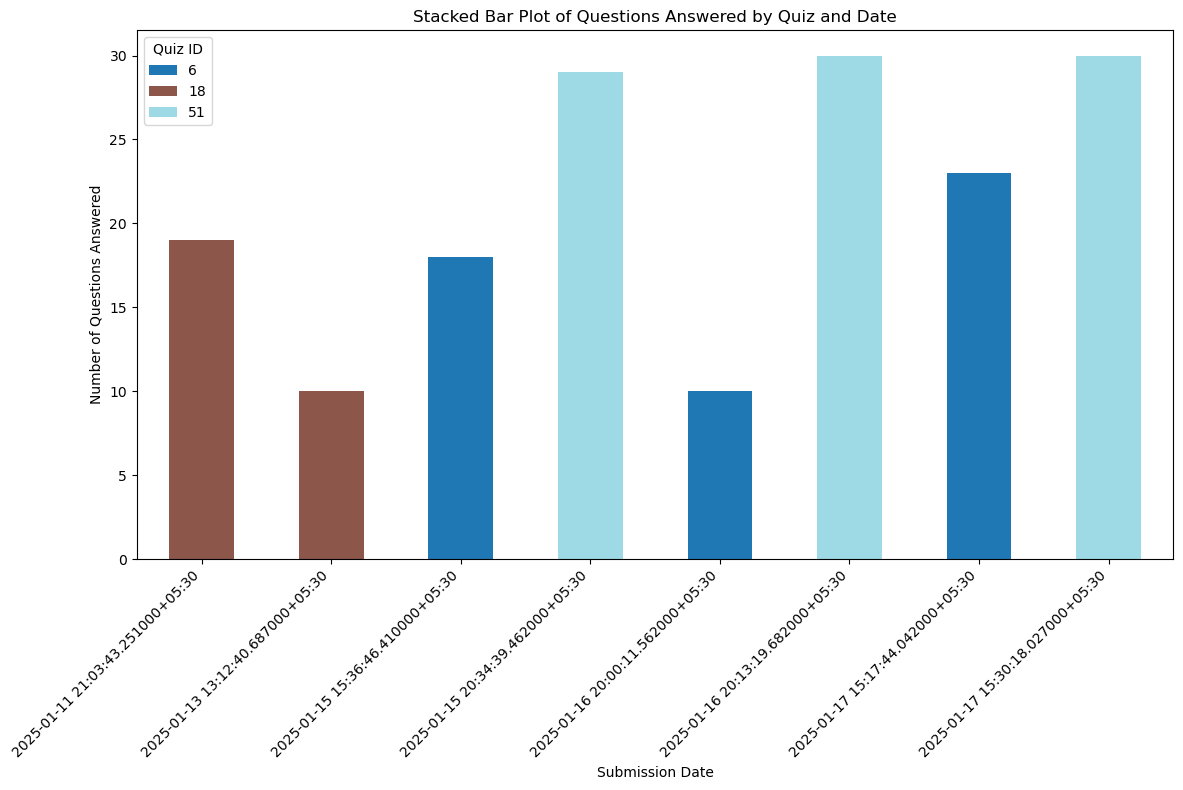

In [14]:
# Create summary data
summary = exploded.groupby(["quiz_id", "submitted_at"]).size().unstack(fill_value=0)

# Plot the stacked bar chart
summary.T.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="tab20")
plt.title("Stacked Bar Plot of Questions Answered by Quiz and Date")
plt.xlabel("Submission Date")
plt.ylabel("Number of Questions Answered")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Quiz ID")
plt.tight_layout()
plt.show()